In [1]:
import pandas as pd
import scipy.stats as stats

In [2]:
df=pd.read_excel('../data/barnstable_analysis_data.xlsx',sheet_name='data')

In [3]:
df

,date,SPX,TB1M
0,1926-01-30,-0.001783,0.003061
1,1926-02-27,-0.033296,0.002612
2,1926-03-31,-0.057708,0.002601
3,1926-04-30,0.038522,0.002270
4,1926-05-28,0.013623,0.002691
...,...,...,...
1167,2023-04-28,0.015015,0.003475
1168,2023-05-31,0.005306,0.004129
1169,2023-06-30,0.066952,0.004302
1170,2023-07-31,0.031700,0.004442


In [4]:
df['excess_return']=df['SPX']-df['TB1M']

### Part 1

#### 1. Historic Var

Frequency of periods with excess returns below historic Var: 2.9 %


<Axes: title={'center': 'Historic Var'}, xlabel='date'>

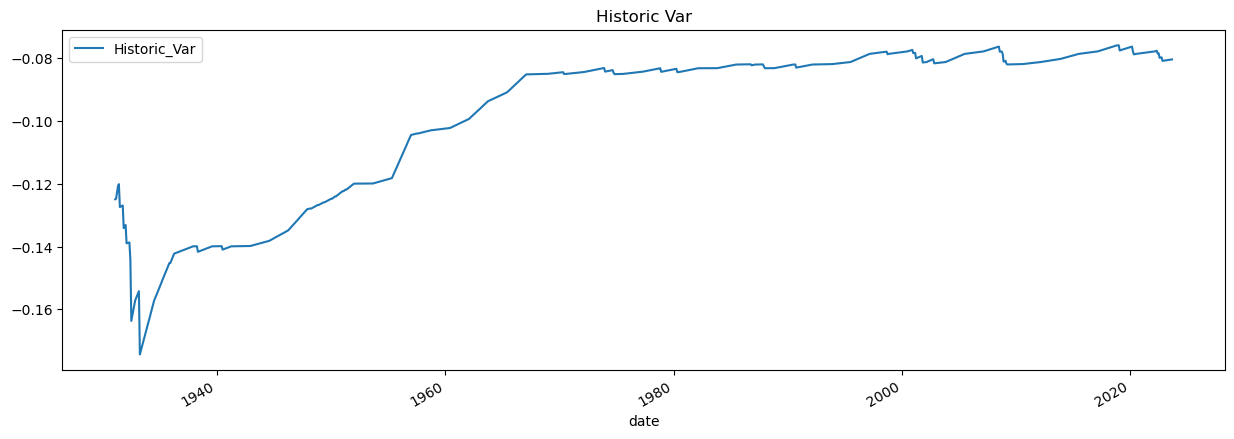

In [5]:
df['Historic_Var']=df['excess_return'].expanding(60).quantile(0.05).shift(1)
print('Frequency of periods with excess returns below historic Var:',round(100*df[df['excess_return']<df['Historic_Var']].shape[0]/df.shape[0],2),'%')
df.plot(x='date', y='Historic_Var', figsize=(15,5), title='Historic Var')

Seems to overestimate Var, the actual frequency is lower than expected. 

It also seems to converge to a value as opposed to respond to variable conditions.

#### 2. Volatility

##### Expanding Series

Frequency of periods with excess returns below 0.05 Var: 0.51 %


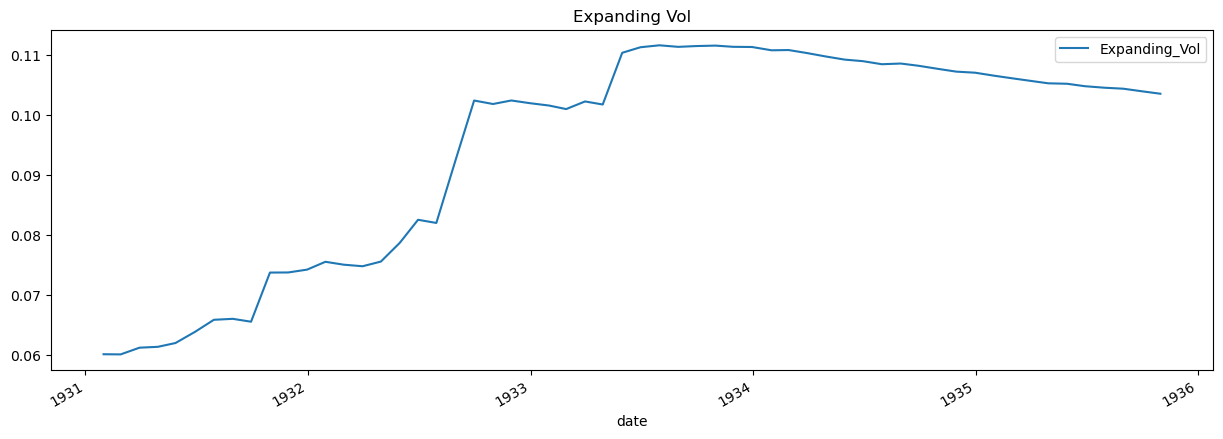

In [6]:
def Mod_Vol(series):
    sum=0
    for i in series:
        sum+=i**2
    return (sum/len(series))**0.5
df['Expanding_Vol']=df['excess_return'].expanding(60).apply(Mod_Vol).shift(1)
df.plot(x='date', y='Expanding_Vol', figsize=(15,5), title='Expanding Vol')
df['0.05_Var_ExpandingVol']=(df['Expanding_Vol']*(-1.65)).shift(1)
print('Frequency of periods with excess returns below 0.05 Var:',round(100*df[df['excess_return']<df['0.05_Var_ExpandingVol']].shape[0]/df.shape[0],2),'%')

Frequency of periods with excess returns below 0.05 Var: 3.5 %


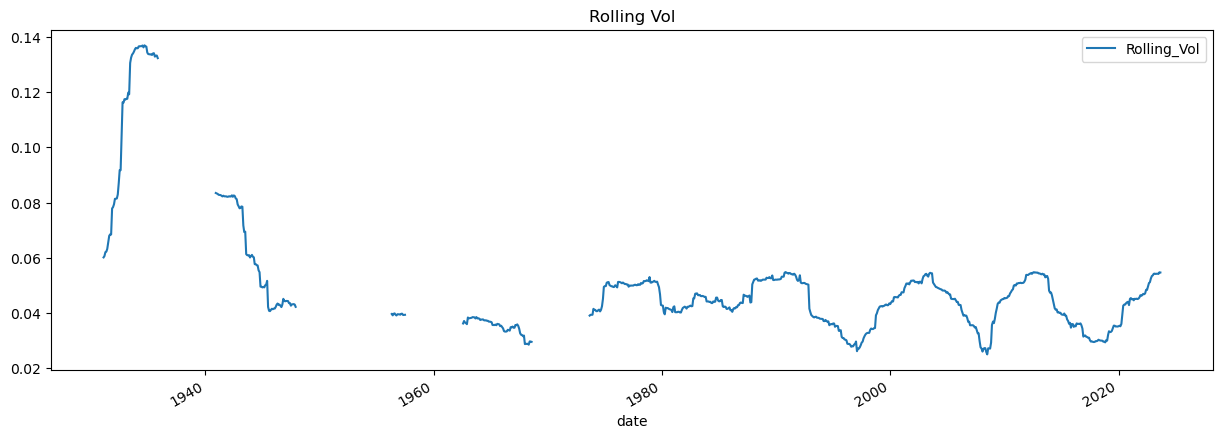

In [7]:
df['Rolling_Vol']=df['excess_return'].rolling(60).apply(Mod_Vol).shift(1)
df.plot(x='date', y='Rolling_Vol', figsize=(15,5), title='Rolling Vol')
df['0.05_Var_RollingVol']=(df['Rolling_Vol']*(-1.65)).shift(1)
print('Frequency of periods with excess returns below 0.05 Var:',round(100*df[df['excess_return']<df['0.05_Var_RollingVol']].shape[0]/df.shape[0],2),'%')

#### 3. CVar

##### Empirical

Frequency of periods with excess returns below historic CVar: 0.77 %


<Axes: title={'center': 'Historic CVar'}, xlabel='date'>

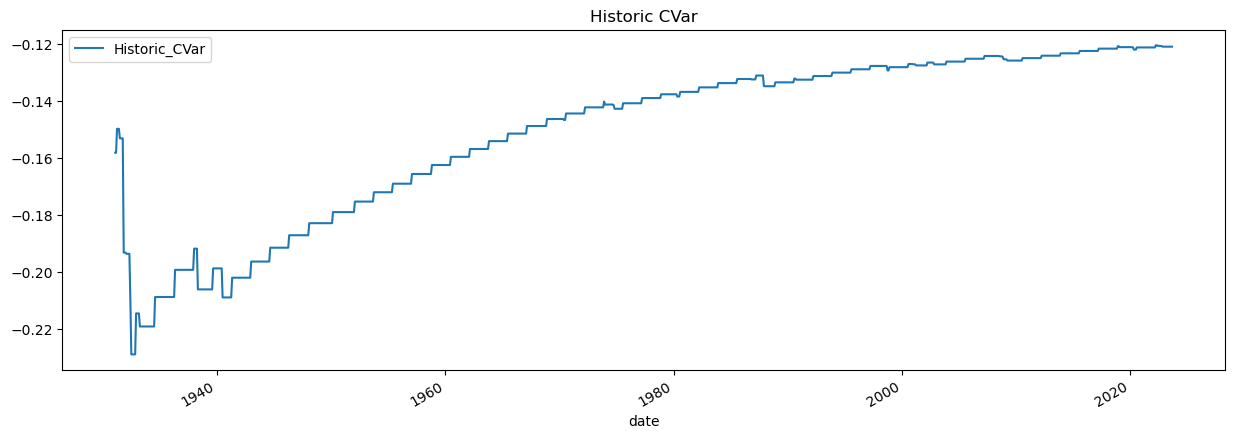

In [8]:
df['Historic_CVar']=df['excess_return'].expanding(60).apply(lambda x: x[x<x.quantile(0.05)].mean()).shift(1)
print('Frequency of periods with excess returns below historic CVar:',round(100*df[df['excess_return']<df['Historic_CVar']].shape[0]/df.shape[0],2),'%')
df.plot(x='date', y='Historic_CVar', figsize=(15,5), title='Historic CVar')

In [15]:
df['0.05_CVar_ExpandingVol']=pd.Series(-stats.norm.pdf(df['Expanding_Vol']*(-1.65))/0.05).shift(1)
print('Frequency of periods with excess returns below 0.05 CVar:',round(100*df[df['excess_return']<df['0.05_CVar_ExpandingVol']].shape[0]/df.shape[0],2),'%')

Frequency of periods with excess returns below 0.05 CVar: 0.0 %


In [16]:
df['0.05_CVar_RollingVol']=pd.Series(-stats.norm.pdf(df['Rolling_Vol']*(-1.65))/0.05).shift(1)
print('Frequency of periods with excess returns below 0.05 CVar:',round(100*df[df['excess_return']<df['0.05_CVar_RollingVol']].shape[0]/df.shape[0],2),'%')

Frequency of periods with excess returns below 0.05 CVar: 0.0 %


In [17]:
df.loc[70:80,['date','excess_return','Historic_Var','0.05_Var_ExpandingVol','0.05_Var_RollingVol','Historic_CVar','0.05_CVar_ExpandingVol','0.05_CVar_RollingVol']]

,date,excess_return,Historic_Var,0.05_Var_ExpandingVol,0.05_Var_RollingVol,Historic_CVar,0.05_CVar_ExpandingVol,0.05_CVar_RollingVol
70,1931-11-30,-0.102177,-0.133588,-0.121686,-0.128469,-0.193283,-7.919991,-7.913274
71,1931-12-31,-0.139883,-0.133082,-0.121716,-0.129267,-0.193283,-7.919961,-7.912460
72,1932-01-30,-0.020177,-0.138924,-0.122501,-0.130985,-0.193719,-7.919202,-7.910692
73,1932-02-29,0.052419,-0.138837,-0.124652,-0.134239,-0.193719,-7.917098,-7.907279
74,1932-03-31,-0.119858,-0.138750,-0.123856,-0.134302,-0.193719,-7.917881,-7.907212
75,1932-04-30,-0.205717,-0.138662,-0.123427,-0.134459,-0.193719,-7.918301,-7.907045
76,1932-05-31,-0.232356,-0.144204,-0.124710,-0.136858,-0.210178,-7.917041,-7.904472
77,1932-06-30,0.002514,-0.163657,-0.129861,-0.143686,-0.228975,-7.911851,-7.896905
78,1932-07-30,0.391584,-0.162034,-0.136212,-0.151440,-0.228975,-7.905169,-7.887875
79,1932-08-31,0.401704,-0.160412,-0.135337,-0.151361,-0.228975,-7.906108,-7.887969


### Part 2

In [ ]:
tdf['Res']=tdf['Col'].rolling(2).sum()
tdf

### Part 3